In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("Movie_regression.csv", header=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             506 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
dtypes: float64(12), int64(4), object(2)
memory usage: 71.2+ KB


### Missing Value Imputation

In [17]:
df["Time_taken"].fillna(value=df["Time_taken"].mean(), inplace = True)

### Dummy variable creation

In [18]:
df = pd.get_dummies(df,columns = ["3D_available","Genre"],drop_first = True)

In [20]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


### X-y split

In [21]:
X = df.loc[:,df.columns!="Collection"]
type(X)

pandas.core.frame.DataFrame

In [22]:
y = df["Collection"]
type(y)

pandas.core.series.Series

### Test-Train Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

### Traing Regression Tree

In [25]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [26]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Predict values using trained model

In [27]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

### Model Performance

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
mean_squared_error(y_test, y_test_pred)

94270653.74813624

In [30]:
r2_score(y_train, y_train_pred)

0.8364651040556869

In [31]:
r2_score(y_test, y_test_pred)

0.707165453856755

### Plotting a decision tree

In [33]:
dot_data = tree.export_graphviz(regtree, out_file=None)

In [34]:
from IPython.display import Image

In [35]:
import pydotplus

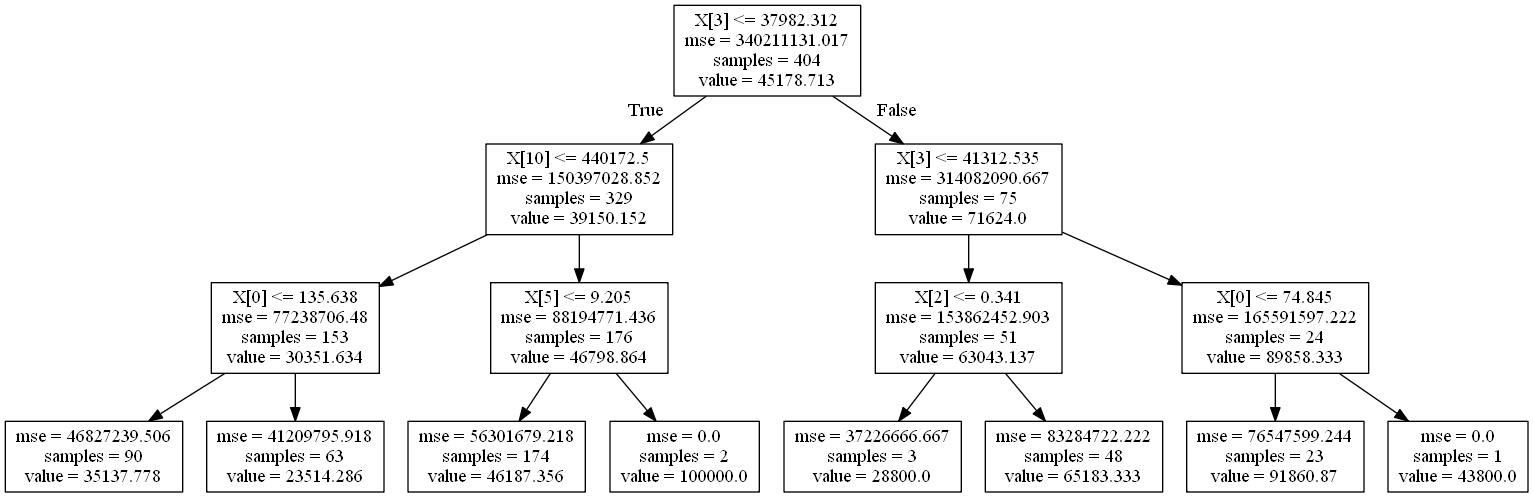

In [36]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())